In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import json

## ATIVIDADE 1

In [2]:
#with open('data/dados_discentes.json', 'r') as f:
f = open('drive/MyDrive/discentes.json',encoding = "utf8")
data = json.load(f)

In [3]:
df = {
    'campus': [],
    'ano': [],
    'semestre': [],
    'curso': [],
    'tipo_curso': [],
    'modalidade': [],
    'sexo': [],
    'escolaridade': [],
    'renda': [],
    'cor': [],
    'nascimento': [],
    'status': []
}

for itens in data:
    item = itens['itens']
    df['campus'].append(item[0]['valor'])
    df['ano'].append(item[1]['valor'])
    df['semestre'].append(item[2]['valor'])
    df['curso'].append(item[3]['valor'])
    df['tipo_curso'].append(item[4]['valor'])
    df['modalidade'].append(item[5]['valor'])
    df['sexo'].append(item[6]['valor'])
    df['escolaridade'].append(item[7]['valor'])
    df['renda'].append(item[8]['valor'])
    df['cor'].append(item[9]['valor'])
    df['nascimento'].append(item[10]['valor'])
    df['status'].append(item[11]['valor'])


In [4]:
df = pd.DataFrame(df)

In [5]:
#for col in df.columns:
    #print(df[[col]].groupby([col]).sum())

#não tem valores nulos

In [6]:
numericos = ['ano', 'semestre', 'nascimento']

df[numericos] = df[numericos].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63728 entries, 0 to 63727
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   campus        63728 non-null  object
 1   ano           63728 non-null  int64 
 2   semestre      63728 non-null  int64 
 3   curso         63728 non-null  object
 4   tipo_curso    63728 non-null  object
 5   modalidade    63728 non-null  object
 6   sexo          63728 non-null  object
 7   escolaridade  63728 non-null  object
 8   renda         63728 non-null  object
 9   cor           63728 non-null  object
 10  nascimento    63728 non-null  int64 
 11  status        63728 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.8+ MB


In [7]:
categoricos = [col for col in df.columns if col not in numericos]
categoricos
df_posprocessing = df.copy()
df_posprocessing = df_posprocessing.drop(columns=categoricos)

ohc = pd.get_dummies(df[categoricos])
df_posprocessing = pd.concat([df_posprocessing, ohc], axis=1, join='outer') #esta é uma maneira mais otimizada que as linhas abaixo (ver o warning)
#df_posprocessing[ohc.columns] = ohc
#df_posprocessing

In [8]:
for col in numericos:
    df_posprocessing[col] = (df_posprocessing[col] - df_posprocessing[col].min()) / (df_posprocessing[col].max() - df_posprocessing[col].min())

In [9]:
# df_posprocessing[numericos]

In [10]:
# df_posprocessing.corr()['status_Não Concluído']

In [11]:
for c in df.columns:
  print(c, "quantidade:",df[c].nunique(), "mais comum:",df[c].mode()[0], "quantidade:",df[c].value_counts()[df[c].mode()[0]],"\n")

campus quantidade: 31 mais comum: Câmpus Goiânia quantidade: 20484 

ano quantidade: 15 mais comum: 2013 quantidade: 5890 

semestre quantidade: 3 mais comum: 1 quantidade: 45197 

curso quantidade: 157 mais comum: Licenciatura em Química quantidade: 3321 

tipo_curso quantidade: 13 mais comum: Integrado quantidade: 16353 

modalidade quantidade: 2 mais comum: Presencial quantidade: 57160 

sexo quantidade: 3 mais comum: M quantidade: 32178 

escolaridade quantidade: 4 mais comum: Ensino Médio quantidade: 33793 

renda quantidade: 8 mais comum: Não Informado quantidade: 24473 

cor quantidade: 7 mais comum: Parda quantidade: 28061 

nascimento quantidade: 80 mais comum: 1996 quantidade: 2952 

status quantidade: 18 mais comum: Evasão quantidade: 18496 



## ATIVIDADE 2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


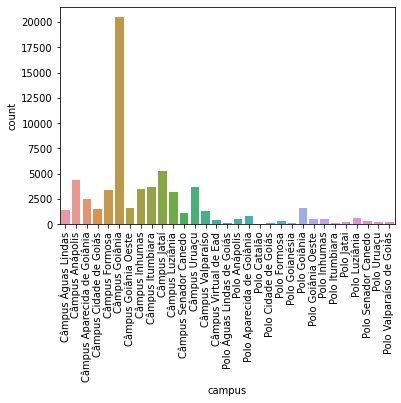

In [12]:
sns.countplot(df['campus']).tick_params(axis='x', rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


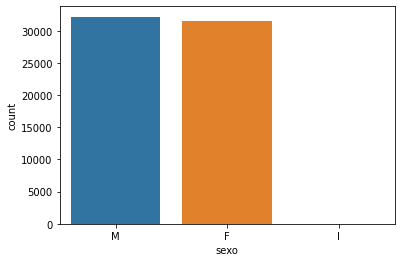

In [13]:
sns.countplot(df['sexo'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


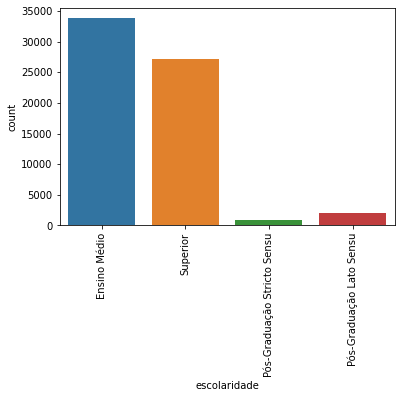

In [14]:
sns.countplot(df['escolaridade']).tick_params(axis='x', rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


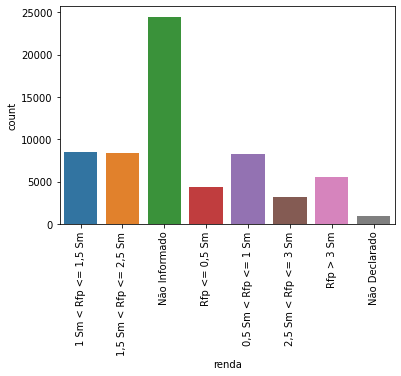

In [15]:
sns.countplot(df['renda']).tick_params(axis='x', rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


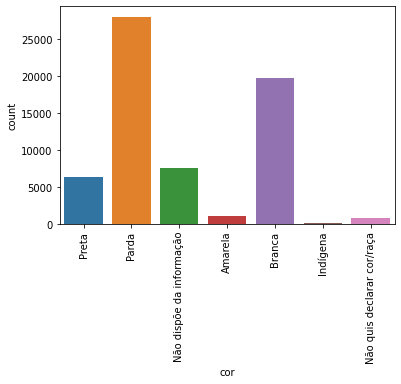

In [16]:
sns.countplot(df['cor']).tick_params(axis='x', rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


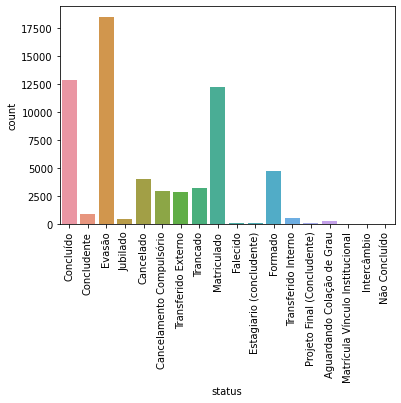

In [17]:
sns.countplot(df['status']).tick_params(axis='x', rotation=90) #situacao em que se encontra

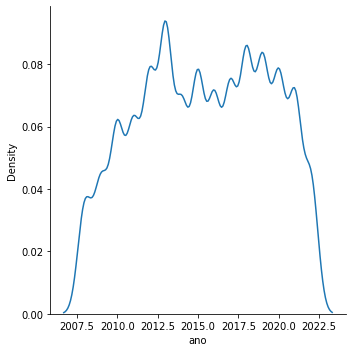

In [18]:
sns.displot(df['ano'],kind = 'kde')

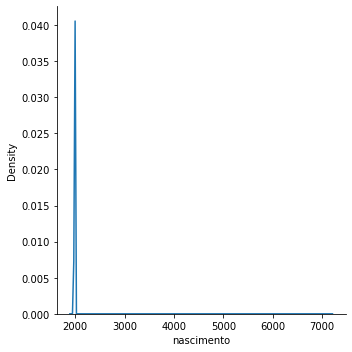

In [19]:
sns.displot(df['nascimento'], kind = 'kde')

In [20]:
#df['nacimento']
#df1 = df.query("nascimento < 1970 & nascimento > 2010")
df1 = df[df['nascimento']<2010]

In [21]:
df1.count()

campus          63697
ano             63697
semestre        63697
curso           63697
tipo_curso      63697
modalidade      63697
sexo            63697
escolaridade    63697
renda           63697
cor             63697
nascimento      63697
status          63697
dtype: int64

In [22]:
#df.sort_values(by=['curso'])['curso'].nunique()
df.groupby('curso')['curso'].nunique() # alunos especiais não é um curso, inconsistência

curso
Alunos Especiais - Mestrado - Câmpus Anápolis          1
Alunos Especiais - Mestrado - Câmpus Aparecida         1
Alunos Especiais - Mestrado - Câmpus Goiânia           1
Alunos Especiais - Mestrado - Câmpus Jataí             1
Bacharelado em Agronomia                               1
                                                      ..
Técnico Subsequente ao Ensino Médio em Mecânica        1
Técnico Subsequente ao Ensino Médio em Mineração       1
Técnico Subsequente em Agrimensura                     1
Técnico Subsequente em Eletrotécnica                   1
Técnico em Informática para Internet - Concomitante    1
Name: curso, Length: 157, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


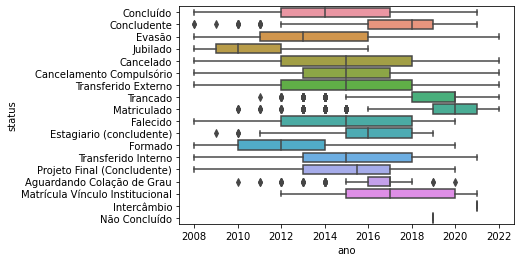

In [23]:
sns.boxplot(df['ano'],df['status']) # 11 e 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


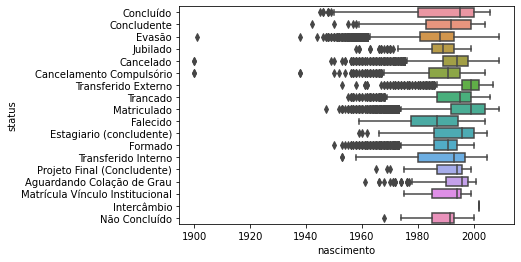

In [24]:
sns.boxplot(df1['nascimento'],df1['status'])

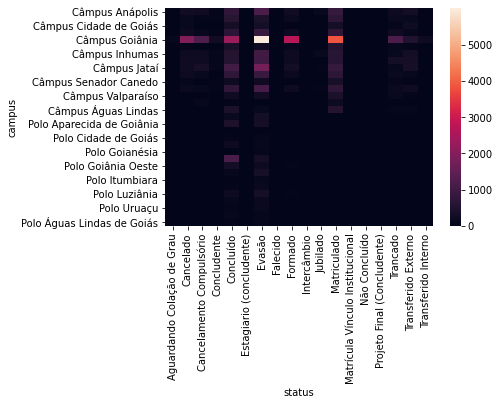

In [25]:
sns.heatmap(pd.crosstab(df['campus'],df['status']))

In [26]:
df_posprocessing

,ano,semestre,nascimento,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,campus_Câmpus Goiânia Oeste,campus_Câmpus Inhumas,...,status_Formado,status_Intercâmbio,status_Jubilado,status_Matriculado,status_Matrícula Vínculo Institucional,status_Não Concluído,status_Projeto Final (Concludente),status_Trancado,status_Transferido Externo,status_Transferido Interno
0,0.428571,0.5,0.014911,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.428571,0.5,0.016044,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.428571,0.5,0.015100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.428571,0.5,0.016799,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.428571,0.5,0.015289,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63723,0.500000,1.0,0.013968,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63724,0.500000,1.0,0.016610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63725,0.500000,1.0,0.016610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63726,0.500000,1.0,0.016233,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


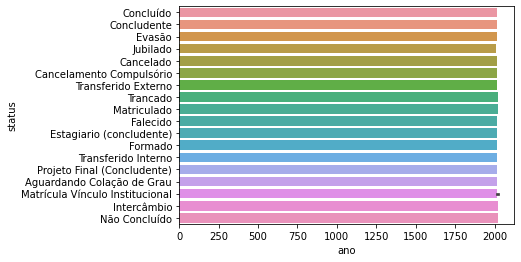

In [27]:
temp = df[df['ano']>=2008]
sns.barplot(temp['ano'],df['status'])

## ATIVIDADE 3

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [29]:
curso_data = df['curso'].drop_duplicates()
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(curso_data)


In [30]:
n_clusters = 22
km = KMeans(n_clusters=n_clusters, random_state=47)
km.fit(x_tfidf)

KMeans(n_clusters=22, random_state=47)

In [31]:
score = silhouette_score(x_tfidf.toarray(), km.labels_)
score

0.13557812608801847

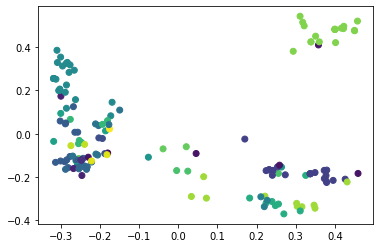

In [32]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x_tfidf.toarray())
plt.scatter(pca_x[:,0], pca_x[:, 1], c= km.labels_)
# plt.show()

Text(0.5, 0, 'Z-axis')

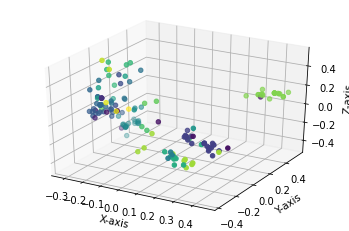

In [33]:
pca = PCA(n_components=3)
pca_x = pca.fit_transform(x_tfidf.toarray())
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = pca_x[:, 0]
y_vals = pca_x[:, 1]
z_vals = pca_x[:, 2]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = km.labels_)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# plt.show()


In [34]:
km.labels_

array([17,  4,  4, 15,  7,  2, 10,  4, 11,  4, 13, 17, 18,  7,  4, 17,  6,
       16, 14,  6,  4, 17,  7, 17,  7, 17,  4, 12, 17,  4,  4,  6,  7, 17,
        6,  4,  1,  4, 17, 10,  4,  5,  6, 16,  0, 10, 10, 10, 10, 10, 10,
       10, 10,  2, 10, 10, 10, 11,  4,  4, 18,  4, 17,  4, 15, 18, 18, 18,
       18, 15,  4,  5,  7,  6,  7, 17, 10, 10, 10, 10, 10,  7, 12,  6,  6,
        2,  6,  6,  8, 14,  7, 17, 17,  6,  4,  6,  7, 17,  8,  8, 10, 17,
        8, 18, 12, 12,  7,  4, 21, 20,  1,  1, 10, 14,  6, 18, 18,  4, 17,
        8,  8, 16, 10,  4, 18, 10, 19, 17,  1, 19,  4, 14, 17,  6, 14,  1,
       17,  5,  8, 17,  3,  3,  3, 10,  3, 13, 13, 13, 13, 13, 13, 20, 14,
        9, 13,  9,  9], dtype=int32)

In [35]:
results = [[] for i in range(n_clusters)]
data = curso_data.to_numpy()
for i, label in enumerate(km.labels_):
    results[label].append(data[i])
    #print(data[i])

In [36]:
# print(results)
for i, l in enumerate(results):
    print("cluster ", i)
    print(l)

cluster  0
['Intercâmbio Cultural Brasil/alemanha']
cluster  1
['Técnico Integrado ao Ensino Médio em Manutenção e Suporte em Informática na Modalidade de Educação de Jovens e Adultos', 'Bacharelado em Informática', 'Técnico Integrado ao Ensino Médio em Informática', 'Técnico Integrado ao Ensino Médio em Manutenção e Suporte em Informática', 'Técnico Integrado em Manutenção e Suporte em Informática']
cluster  2
['Licenciatura em Química', 'Superior de Tecnologia em Química Agroindustrial', 'Bacharelado em Química']
cluster  3
['Alunos Especiais - Mestrado - Câmpus Goiânia', 'Alunos Especiais - Mestrado - Câmpus Jataí', 'Alunos Especiais - Mestrado - Câmpus Anápolis', 'Alunos Especiais - Mestrado - Câmpus Aparecida']
cluster  4
['Técnico Integrado ao Ensino Médio em Vigilância em Saúde', 'Técnico Integrado ao Ensino Médio em Análises Clínicas', 'Técnico Integrado ao Ensino Médio em Edificações', 'Técnico Integrado ao Ensino Médio em Química', 'Técnico Integrado ao Ensino Médio em Comérc

# Atividade 4

Alunos com baixa renda familiar tenderam a evadir mais na modalidade a distancia?

A idade dos alunos influencia na taxa de evasão?

Qual a taxa de evasão por grupo racial?

In [37]:
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63723,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"2,5 Sm < Rfp <= 3 Sm",Branca,1974,Evasão
63724,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63725,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63726,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão


In [38]:
questao_1 = df[df["modalidade"] == "À Distância"].groupby("renda").count()
questao_1_evadiu = df[df["modalidade"] == "À Distância"][df["status"] == "Evasão"].groupby("renda").count()
questao_1["taxa"] = (questao_1_evadiu["status"]/questao_1["status"])*100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [39]:
questao_1

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,cor,nascimento,status,taxa
renda,,,,,,,,,,,,
"0,5 Sm < Rfp <= 1 Sm",359,359,359,359,359,359,359,359,359,359,359,56.545961
"1 Sm < Rfp <= 1,5 Sm",406,406,406,406,406,406,406,406,406,406,406,44.581281
"1,5 Sm < Rfp <= 2,5 Sm",429,429,429,429,429,429,429,429,429,429,429,34.032634
"2,5 Sm < Rfp <= 3 Sm",151,151,151,151,151,151,151,151,151,151,151,31.125828
Não Declarado,52,52,52,52,52,52,52,52,52,52,52,40.384615
Não Informado,4769,4769,4769,4769,4769,4769,4769,4769,4769,4769,4769,47.703921
"Rfp <= 0,5 Sm",91,91,91,91,91,91,91,91,91,91,91,36.263736
Rfp > 3 Sm,311,311,311,311,311,311,311,311,311,311,311,35.369775


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


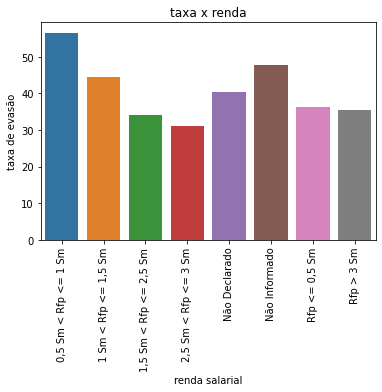

In [40]:
fig = sns.barplot(questao_1.index, questao_1["taxa"]).tick_params(axis='x', rotation = 90)
plt.xlabel("renda salarial")
plt.ylabel("taxa de evasão")
plt.title("taxa x renda") # You can comment this line out if you don't need title
plt.show(fig)


In [41]:

questao_2 = df.groupby("nascimento").count()
questao_2_evadiu = df[df["status"] == "Evasão"].groupby("nascimento").count()

questao_2["taxa"] = (questao_2_evadiu["status"]/questao_2["status"])*100
questao_2 = questao_2[questao_2["status"] > 245]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


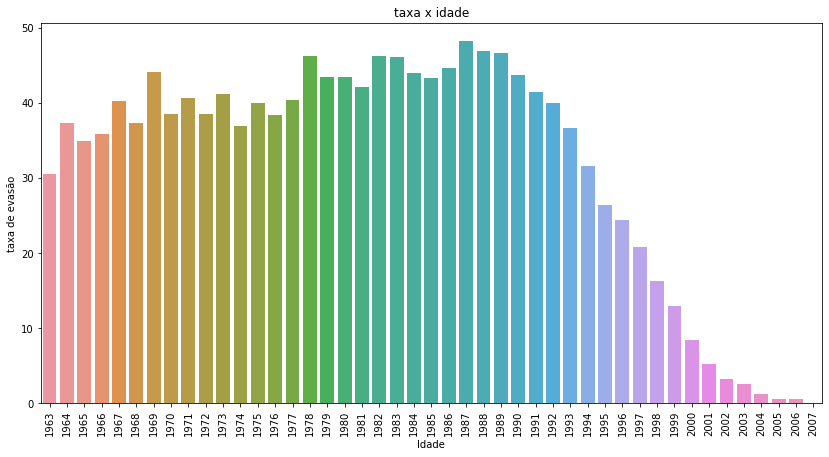

<Figure size 864x864 with 0 Axes>

In [42]:
plt.rcParams['figure.figsize'] = [14, 7]
fig = sns.barplot(questao_2.index, questao_2["taxa"]).tick_params(axis='x', rotation = 90)
plt.xlabel("Idade")
plt.ylabel("taxa de evasão")
plt.title("taxa x idade") # You can comment this line out if you don't need title
plt.figure(figsize=(12,12))
plt.show(fig)

In [43]:
questao_3 = df.groupby("cor").count()
questao_3_evadiu = df[df["status"] == "Evasão"].groupby("cor").count()
questao_3["taxa"] = (questao_3_evadiu["status"]/questao_3["status"])*100

In [44]:
questao_3

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,nascimento,status,taxa
cor,,,,,,,,,,,,
Amarela,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,30.447471
Branca,19720,19720,19720,19720,19720,19720,19720,19720,19720,19720,19720,25.212982
Indígena,164,164,164,164,164,164,164,164,164,164,164,29.878049
Não dispõe da informação,7592,7592,7592,7592,7592,7592,7592,7592,7592,7592,7592,43.177028
Não quis declarar cor/raça,822,822,822,822,822,822,822,822,822,822,822,25.060827
Parda,28061,28061,28061,28061,28061,28061,28061,28061,28061,28061,28061,28.185025
Preta,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341,27.897808


In [45]:
questao_3_evadiu

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,nascimento,status
cor,,,,,,,,,,,
Amarela,313,313,313,313,313,313,313,313,313,313,313
Branca,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972
Indígena,49,49,49,49,49,49,49,49,49,49,49
Não dispõe da informação,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278
Não quis declarar cor/raça,206,206,206,206,206,206,206,206,206,206,206
Parda,7909,7909,7909,7909,7909,7909,7909,7909,7909,7909,7909
Preta,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


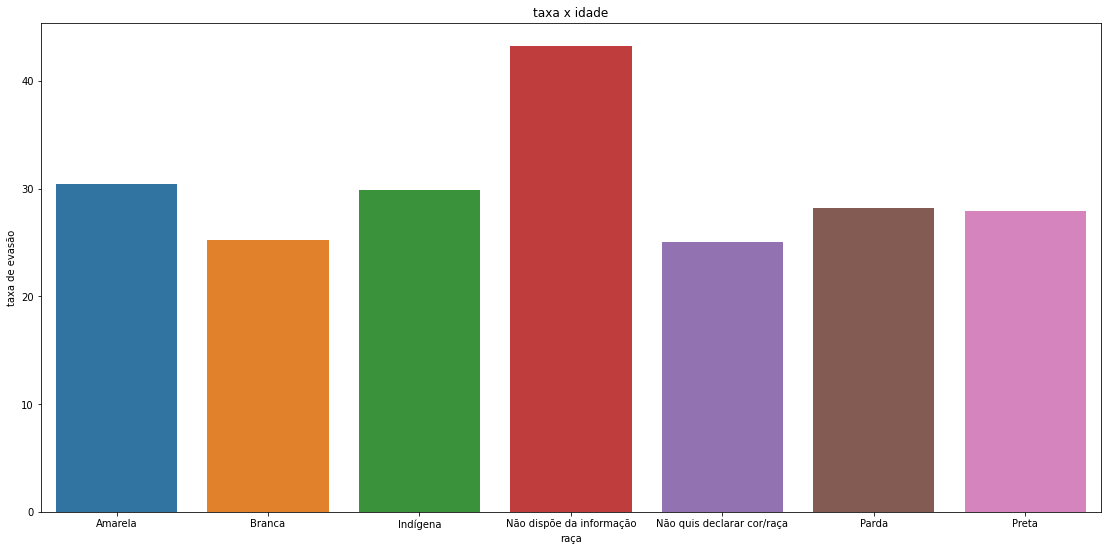

<Figure size 864x864 with 0 Axes>

In [46]:
plt.rcParams['figure.figsize'] = [19, 9]
fig = sns.barplot(questao_3.index, questao_3["taxa"])
plt.xlabel("raça")
plt.ylabel("taxa de evasão")
plt.title("taxa x idade") # You can comment this line out if you don't need title
plt.figure(figsize=(12,12))
plt.show(fig)

## Tarefa 2


In [47]:
# from sklearn.cluster import DBSCAN

In [48]:
# df_2 = df[df["status"]== "Evasão"][["ano", "escolaridade", "renda", "nascimento"]]

In [49]:
# df_2 = pd.get_dummies(df_2)

In [50]:
# pca = PCA(n_components=2)
# pca_x = pca.fit_transform(df_2)

In [51]:
def search_parameters_kmeans(X, n_clusters=[]):
    score = float("-inf")
    n_total = 0
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        new_score = silhouette_score(X, kmeans.labels_)

        print("n_cluster:", n, "score:", new_score)
        if new_score > score:
            score = new_score
            n_total = n
            
    return score, n_total


def search_parameters_dbscan(X, eps = [], min_samples = []):
    score = float("-inf")
    e_final = 0
    ms_final = 0
    for e in eps:
        for ms in min_samples:
            dbscan = DBSCAN(eps=e, min_samples=ms)
            dbscan.fit(X)
            new_score = silhouette_score(X, dbscan.labels_)

            print("eps:", e, "ms:", ms, "score:", new_score)
            if new_score > score:
                score = new_score
                e_final = e
                ms_final = ms
            
    return score, e_final, ms_final


In [52]:
# score_2, n_clusters_2 = search_parameters_kmeans(df_2, n_clusters= range(2, 10))
# n_cluster_2 = 2

In [53]:
# kmeans = KMeans(n_clusters=n_clusters_2, random_state=47)
# kmeans.fit(df_2)

# score = silhouette_score(df_2, kmeans.labels_)
# score

In [54]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= kmeans.labels_)
# plt.show()

In [55]:
# db_score_2, eps_2, min_samples_2 = search_parameters_dbscan(df_2, eps = range(1, 11), min_samples = range(2, 5))
# eps_2 = 7
# min_samples_2 = 2

In [56]:
#eps: 7, ms: 2
#n_cluster: 2

In [57]:
# dbscan = DBSCAN(eps=eps_2, min_samples=min_samples_2).fit(df_2)
# score = silhouette_score(df_2, dbscan.labels_)
# score

In [58]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= dbscan.labels_)
# plt.show()

In [59]:
# df_3 = df[df["status"]== "Evasão"][["campus", "curso", "tipo_curso", "modalidade", "sexo", "cor"]]

In [60]:
# df_3 = pd.get_dummies(df_3)

In [61]:
# score_km_3, n_cluster_3 = search_parameters_kmeans(df_3, range(550, 700, 10)) 
# n_cluster_3 = 600

In [62]:
# kmeans = KMeans(n_clusters=n_cluster_3)
# kmeans.fit(df_3)

# score = silhouette_score(df_3, kmeans.labels_)
# score

In [63]:
# pca = PCA(n_components=2)
# pca_x = pca.fit_transform(df_3)

In [64]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= kmeans.labels_)
# plt.show()

In [65]:
# db_score_3, eps_3, min_samples_3 = search_parameters_dbscan(df_3, eps = [0.5], min_samples = [1])

In [66]:
# dbscan = DBSCAN(eps=1, min_samples=min_samples_3).fit(df_3)
# score = silhouette_score(df_3, dbscan.labels_)
# score

In [67]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= dbscan.labels_)
# plt.show()

In [68]:
df['status'].value_counts()

Evasão                             18496
Concluído                          12853
Matriculado                        12274
Formado                             4739
Cancelado                           3971
Trancado                            3229
Cancelamento Compulsório            2954
Transferido Externo                 2829
Concludente                          916
Transferido Interno                  503
Jubilado                             427
Aguardando Colação de Grau           271
Estagiario (concludente)             115
Projeto Final (Concludente)           66
Falecido                              47
Não Concluído                         30
Matrícula Vínculo Institucional        7
Intercâmbio                            1
Name: status, dtype: int64

In [69]:
def funcao(x):
    if x in ["Evasão", "Cancelamento Compulsório","Cancelado","Jubilado"]:
        return 0
    elif x in ["Concluído","Formado"]:
        return 1
    else:
        return -1

In [70]:
newDf = df.copy()
newDf["status"] = newDf["status"].apply(lambda x: funcao(x))
newDf = newDf[newDf["status"]!= -1]
newDf.reset_index(inplace=True)

In [71]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True)
y = newDf['status'].astype("category").cat.codes
x = pd.get_dummies(newDf[["campus","curso","tipo_curso","modalidade","sexo","escolaridade","renda","cor"]])

In [72]:
x["nascimento"] = newDf["nascimento"]
x["semestre"] = newDf["semestre"]
x["ano"] = newDf["ano"]

TRAIN: [    0     1     2 ... 43435 43436 43438] TEST: [   14    17    19 ... 43433 43437 43439]
0.6869424834417139
0.7316988950276243


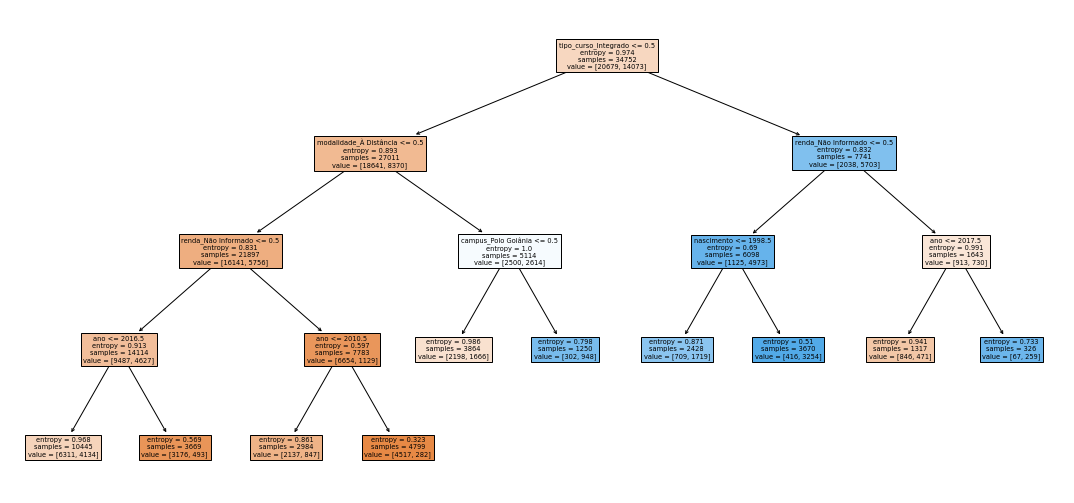

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score
mean = 0
clf = DecisionTreeClassifier(random_state=0,criterion = "entropy", max_depth = 5, max_leaf_nodes=10)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index, :], x.loc[test_index, :]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mean += f1_score(y_test,y_pred, average = "macro")
    print(f1_score(y_test,y_pred, average = "macro"))
    print(accuracy_score(y_test,y_pred))
    plot_tree(clf, filled=True, feature_names = x_train.columns)

    plt.savefig("arvore.pdf")
    break

In [74]:
df["status"].value_counts()

Evasão                             18496
Concluído                          12853
Matriculado                        12274
Formado                             4739
Cancelado                           3971
Trancado                            3229
Cancelamento Compulsório            2954
Transferido Externo                 2829
Concludente                          916
Transferido Interno                  503
Jubilado                             427
Aguardando Colação de Grau           271
Estagiario (concludente)             115
Projeto Final (Concludente)           66
Falecido                              47
Não Concluído                         30
Matrícula Vínculo Institucional        7
Intercâmbio                            1
Name: status, dtype: int64

TRAIN: [    0     1     2 ... 43436 43438 43439] TEST: [    6    11    12 ... 43421 43427 43437]
0.7467771639042358
0.7355516211990595


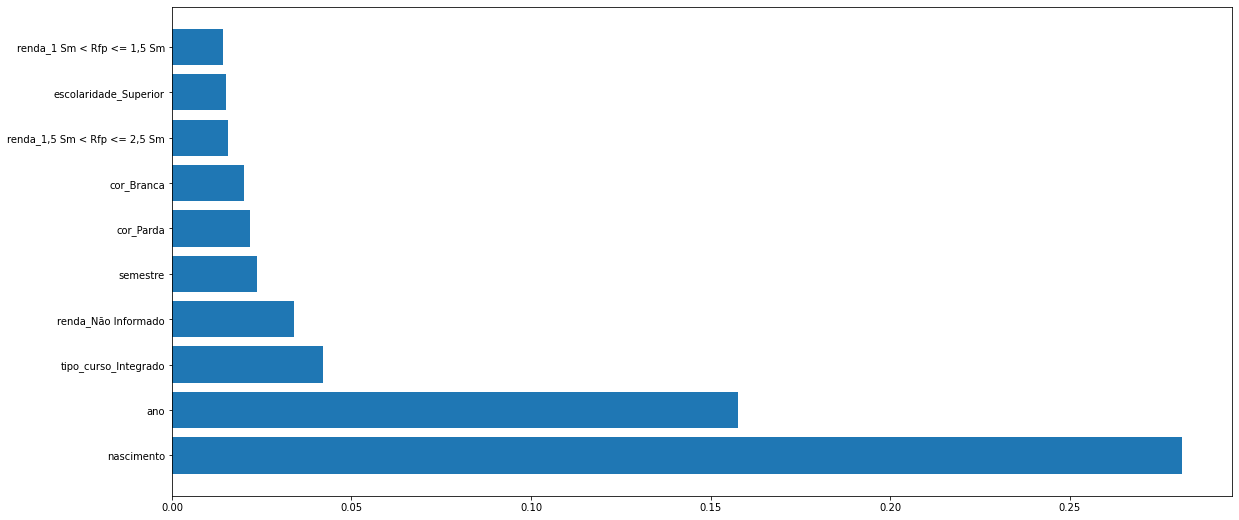

f1: 0.7355516211990595


In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import numpy as np
mean = 0
rf = RandomForestClassifier(n_jobs = -1, random_state = 42,criterion='entropy')
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index, :], x.loc[test_index, :]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(accuracy_score(y_test,y_pred))
    mean += f1_score(y_test,y_pred, average = "macro")
    print(f1_score(y_test,y_pred, average = "macro"))
    idx = np.argsort(rf.feature_importances_)
    names = x_train.columns[idx][::-1]
    features = rf.feature_importances_[idx][::-1]
    plt.barh(names[:10], features[:10])
    cm =confusion_matrix(y_test, y_pred, labels=rf.classes_)
    # disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
    # disp.plot()
    plt.show()
    break
print("f1:", mean/1)

# tarefa stacking

In [76]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [77]:
def get_stacking():
	rf = RandomForestClassifier(n_jobs = -1, random_state = 42,criterion='entropy',min_samples_leaf=10,n_estimators=500,max_depth = 10)
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	# level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', LinearSVC()))
	level0.append(('bayes', GaussianNB()))
	level0.append(('rf',rf))
	level1 = LogisticRegression()
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
	

In [78]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	# models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier(random_state=0,criterion = "entropy",max_depth=5,max_leaf_nodes=10)
	models['svm'] = LinearSVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

In [79]:
import gc
def evaluate_model(model, X, y):
	cv = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
	scores = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1, error_score='raise')
	gc.collect()
	return scores

In [80]:
# import numpy as np
# models = get_models()
# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model, x, y)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()


# Regras de Associacao

In [81]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [82]:
d = df.copy()[["semestre","curso","renda","cor", "status"]]
d = d[d["curso"] == "Bacharelado em Ciência da Computação"]
d.drop(columns=["curso", "semestre"], inplace = True)
d

,renda,cor,status
3236,"1 Sm < Rfp <= 1,5 Sm",Parda,Cancelamento Compulsório
3237,"1,5 Sm < Rfp <= 2,5 Sm",Branca,Matriculado
3238,"1,5 Sm < Rfp <= 2,5 Sm",Parda,Cancelado
3239,"1,5 Sm < Rfp <= 2,5 Sm",Branca,Cancelado
3240,"1 Sm < Rfp <= 1,5 Sm",Branca,Matriculado
...,...,...,...
5521,"Rfp <= 0,5 Sm",Parda,Matriculado
5522,"Rfp <= 0,5 Sm",Parda,Cancelado
5523,"0,5 Sm < Rfp <= 1 Sm",Branca,Matriculado
5524,"1,5 Sm < Rfp <= 2,5 Sm",Parda,Matriculado


In [83]:
dataset = []

for i,row in d.iterrows():
  new_item = []
  for item in row:
    new_item.append(str(item))
  dataset.append(new_item)

dataset[0]


['1 Sm < Rfp <= 1,5 Sm', 'Parda', 'Cancelamento Compulsório']

In [84]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [85]:
first5 = te_ary[:5]
te.inverse_transform(first5)[0]

['1 Sm < Rfp <= 1,5 Sm', 'Cancelamento Compulsório', 'Parda']

In [86]:
te_df = pd.DataFrame(te_ary, columns=te.columns_)
te_df.head()

,"0,5 Sm < Rfp <= 1 Sm","1 Sm < Rfp <= 1,5 Sm","1,5 Sm < Rfp <= 2,5 Sm","2,5 Sm < Rfp <= 3 Sm",Amarela,Branca,Cancelado,Cancelamento Compulsório,Concludente,Estagiario (concludente),...,Matriculado,Não Declarado,Não Informado,Não quis declarar cor/raça,Parda,Preta,"Rfp <= 0,5 Sm",Rfp > 3 Sm,Trancado,Transferido Externo
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


    Confidence  Number of rules
0          0.0               56
1          0.1               56
2          0.2               42
3          0.3               32
4          0.4               22
5          0.5                7
6          0.6                0
7          0.7                0
8          0.8                0
9          0.9                0
10         1.0                0


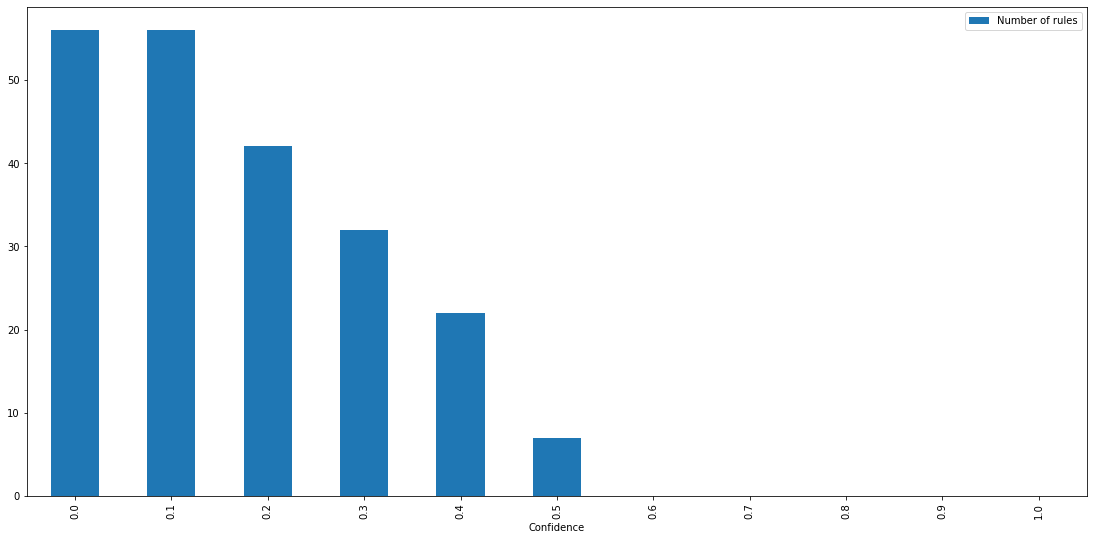

In [87]:
frequent_itemsets = apriori(te_df, min_support=0.05, use_colnames=True)
frequent_itemsets

confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
number_of_rules = []

for i in confidence:
    a = association_rules(frequent_itemsets, metric="confidence", min_threshold=i)
    number_of_rules.append(len(a))

data = {'Confidence': confidence, 'Number of rules': number_of_rules}
df2 = pd.DataFrame(data=data)
print(df2)
plot = df2.plot.bar(x='Confidence', y='Number of rules')

In [88]:
ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

In [89]:
status = d["status"].unique()

In [90]:
regras = []

for i, row in ar.iterrows():
    for s in status:
      if s in row["antecedents"] or s in row["consequents"]:
        regras.append(row.to_list())
regras = pd.DataFrame(regras, columns=ar.columns)
regras.sort_values(by="support", ascending = False, inplace = True)

In [91]:
regras.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Branca),(Matriculado),0.459144,0.416342,0.202335,0.440678,1.058451,0.011174,1.043509
3,(Matriculado),(Branca),0.416342,0.459144,0.202335,0.485981,1.058451,0.011174,1.052211
7,(Parda),(Matriculado),0.439689,0.416342,0.178988,0.407080,0.977752,-0.004073,0.984378
8,(Matriculado),(Parda),0.416342,0.439689,0.178988,0.429907,0.977752,-0.004073,0.982841
9,"(Rfp <= 0,5 Sm)",(Matriculado),0.280156,0.416342,0.155642,0.555556,1.334372,0.039001,1.313230
4,(Trancado),(Branca),0.171206,0.459144,0.093385,0.545455,1.187982,0.014777,1.189883
6,(Evasão),(Parda),0.159533,0.439689,0.081712,0.512195,1.164904,0.011567,1.148638
5,(Cancelado),(Parda),0.151751,0.439689,0.077821,0.512821,1.166326,0.011098,1.150113
0,(Evasão),"(0,5 Sm < Rfp <= 1 Sm)",0.159533,0.284047,0.070039,0.439024,1.545606,0.024724,1.276265
10,(Trancado),"(Rfp <= 0,5 Sm)",0.171206,0.280156,0.070039,0.409091,1.460227,0.022075,1.218198


In [92]:
ar.sort_values(by="support", ascending = False, inplace = True)
ar.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Branca),(Matriculado),0.459144,0.416342,0.202335,0.440678,1.058451,0.011174,1.043509
8,(Matriculado),(Branca),0.416342,0.459144,0.202335,0.485981,1.058451,0.011174,1.052211
14,(Matriculado),(Parda),0.416342,0.439689,0.178988,0.429907,0.977752,-0.004073,0.982841
13,(Parda),(Matriculado),0.439689,0.416342,0.178988,0.407080,0.977752,-0.004073,0.984378
15,"(Rfp <= 0,5 Sm)",(Matriculado),0.280156,0.416342,0.155642,0.555556,1.334372,0.039001,1.313230
2,"(0,5 Sm < Rfp <= 1 Sm)",(Parda),0.284047,0.439689,0.136187,0.479452,1.090435,0.011295,1.076387
0,"(0,5 Sm < Rfp <= 1 Sm)",(Branca),0.284047,0.459144,0.124514,0.438356,0.954725,-0.005905,0.962988
16,"(Rfp <= 0,5 Sm)",(Parda),0.280156,0.439689,0.124514,0.444444,1.010816,0.001332,1.008560
9,"(Rfp <= 0,5 Sm)",(Branca),0.280156,0.459144,0.124514,0.444444,0.967985,-0.004118,0.973541
3,"(1 Sm < Rfp <= 1,5 Sm)",(Branca),0.190661,0.459144,0.093385,0.489796,1.066759,0.005844,1.060078
